In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys
import glob

data_dir = "../daily_dataset/"

There are 112 files in this folder, with each file containing data for 50 homes

In [4]:
print(len(os.listdir(data_dir+'daily_dataset')))
os.listdir(data_dir+'daily_dataset')[:5]

113


['block_71.csv',
 'block_65.csv',
 'block_59.csv',
 'block_58.csv',
 'block_64.csv']

Read data for a single home

In [5]:
daily_df = pd.read_csv(data_dir+'daily_dataset/block_71.csv')
daily_df['day'] = pd.to_datetime(daily_df['day'])
daily_df = daily_df.set_index('day')
daily_df.head()

,LCLid,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,,
2011-12-07,MAC000027,0.1470,0.159880,0.408,25,0.062123,3.997,0.103
2011-12-08,MAC000027,0.1705,0.193479,0.459,48,0.077042,9.287,0.105
2011-12-09,MAC000027,0.1440,0.156771,0.365,48,0.051995,7.525,0.101
2011-12-10,MAC000027,0.2415,0.264250,0.814,48,0.135007,12.684,0.101
2011-12-11,MAC000027,0.2785,0.288438,0.540,48,0.112697,13.845,0.126


Each home is referenced by LCLid

In [6]:
len(daily_df["LCLid"].unique())

50

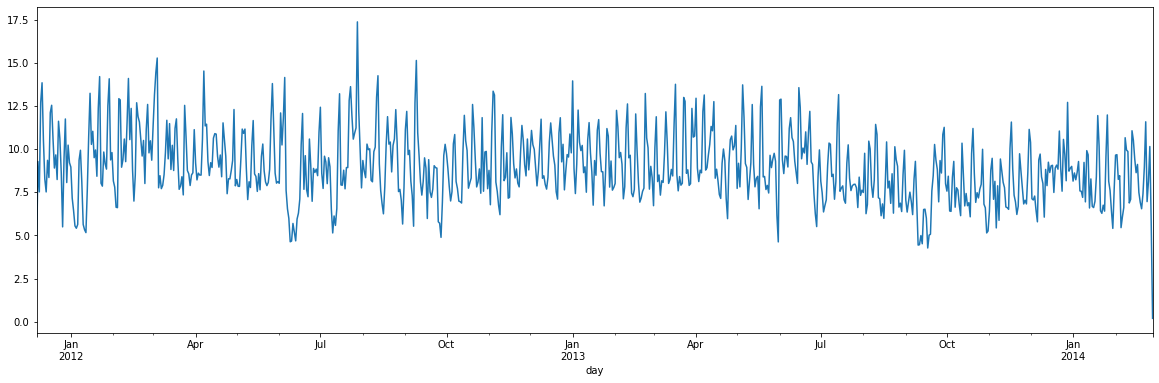

In [7]:
daily_df[daily_df["LCLid"]=="MAC000027"]["energy_sum"].plot(figsize=(20,6));

What we discover is that there is not data for all homes for all time, but it appears more homes are coming online during 2012

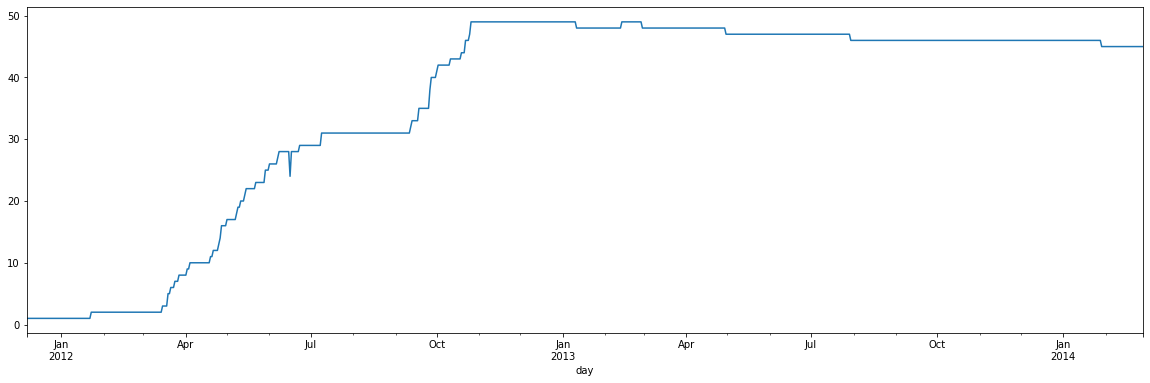

In [8]:
daily_df.reset_index().groupby("day").nunique()["LCLid"].plot(figsize=(20,6));

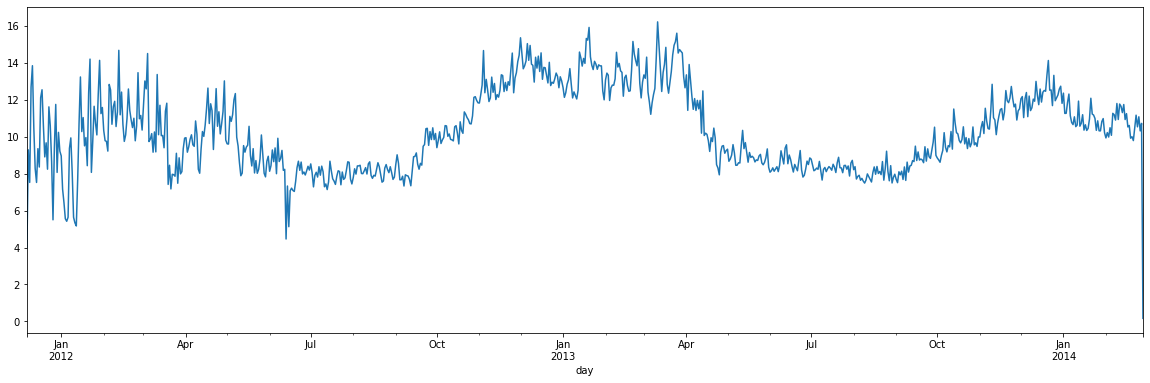

In [9]:

num_households_df = daily_df.reset_index().groupby("day").nunique()["LCLid"] # get the number of households on each day
energy_df = daily_df.reset_index().groupby("day").sum()["energy_sum"] # get the total energy usage per day

# normalise the energy usage to the number of households and plot
energy_per_household_df = pd.concat([num_households_df, energy_df], axis=1)
energy_per_household_df["normalised"] = energy_per_household_df["energy_sum"] / energy_per_household_df["LCLid"]
energy_per_household_df["normalised"].plot(figsize=(20,6));

In [10]:
info_df = pd.read_csv('../informations_households.csv')
info_df.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [11]:
# Helper to load a single file
def daily_to_df(file_path : str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['day'] = pd.to_datetime(df['day'])
    df["year"] = df["day"].apply(lambda x : x.year)
    df["month"] = df["day"].apply(lambda x : x.month)
    df["dayofweek"] = df["day"].apply(lambda x : x.dayofweek)
    df["day_name"] = df["day"].apply(lambda x : x.day_name())
    df = df.merge(info_df, on="LCLid")
    df = df[df["year"].isin([2012, 2013])]
    return df[["LCLid", "day", "year", "month", "day_name", "Acorn_grouped", "energy_sum"]]

df = daily_to_df(data_dir+'daily_dataset/block_71.csv')
df.head()

,LCLid,day,year,month,day_name,Acorn_grouped,energy_sum
25,MAC000027,2012-01-01,2012,1,Sunday,Comfortable,8.962
26,MAC000027,2012-01-02,2012,1,Monday,Comfortable,7.159
27,MAC000027,2012-01-03,2012,1,Tuesday,Comfortable,6.430
28,MAC000027,2012-01-04,2012,1,Wednesday,Comfortable,5.556
29,MAC000027,2012-01-05,2012,1,Thursday,Comfortable,5.420


In [12]:
all_daily_df = pd.DataFrame()

for i, file_path in enumerate(glob.glob(data_dir+'daily_dataset/*.csv')):
    all_daily_df = all_daily_df.append(daily_to_df(file_path))
    print(all_daily_df.shape)

(26470, 7)
(51716, 7)
(78920, 7)
(106848, 7)
(135599, 7)
(161877, 7)
(192524, 7)
(217067, 7)
(243656, 7)
(270171, 7)
(297277, 7)
(328519, 7)
(355371, 7)
(385094, 7)
(414031, 7)
(443521, 7)
(471961, 7)
(498837, 7)
(529525, 7)
(559054, 7)
(585008, 7)
(612127, 7)
(642219, 7)
(671554, 7)
(701947, 7)
(732495, 7)
(760520, 7)
(787423, 7)
(817687, 7)
(846023, 7)
(875988, 7)
(906038, 7)
(934140, 7)
(960899, 7)
(990045, 7)
(1019187, 7)
(1052501, 7)
(1083426, 7)
(1111958, 7)
(1138025, 7)
(1168273, 7)
(1199550, 7)
(1228058, 7)
(1257011, 7)
(1280012, 7)
(1309157, 7)
(1336574, 7)
(1366709, 7)
(1397601, 7)
(1425171, 7)
(1453912, 7)
(1483104, 7)
(1509821, 7)
(1539557, 7)
(1571763, 7)
(1601232, 7)
(1631462, 7)
(1661165, 7)
(1690553, 7)
(1719747, 7)
(1748322, 7)
(1779386, 7)
(1808659, 7)
(1837873, 7)
(1870929, 7)
(1899441, 7)
(1926655, 7)
(1956678, 7)
(1986068, 7)
(2016435, 7)
(2046730, 7)
(2076910, 7)
(2104061, 7)
(2133279, 7)
(2162424, 7)
(2171403, 7)
(2202338, 7)
(2231152, 7)
(2260689, 7)
(2291474, 7

Do some basic prep

In [13]:
all_daily_df = all_daily_df.drop_duplicates()
all_daily_df = all_daily_df.dropna()
all_daily_df.head()

,LCLid,day,year,month,day_name,Acorn_grouped,energy_sum
25,MAC000027,2012-01-01,2012,1,Sunday,Comfortable,8.962
26,MAC000027,2012-01-02,2012,1,Monday,Comfortable,7.159
27,MAC000027,2012-01-03,2012,1,Tuesday,Comfortable,6.430
28,MAC000027,2012-01-04,2012,1,Wednesday,Comfortable,5.556
29,MAC000027,2012-01-05,2012,1,Thursday,Comfortable,5.420


In [14]:
y2013_df = all_daily_df[all_daily_df['year']==2013]

In [15]:
y2013_df.groupby("Acorn_grouped").count()["LCLid"]

Acorn_grouped
ACORN-            247
ACORN-U         16957
Adversity      633152
Affluent       758448
Comfortable    531420
Name: LCLid, dtype: int64

In [16]:
y2013_df = y2013_df[y2013_df["Acorn_grouped"].isin(["Adversity", "Affluent", "Comfortable"])]

In [17]:
sum_y2013_df = pd.concat([y2013_df.groupby("Acorn_grouped").sum()["energy_sum"], y2013_df.groupby("Acorn_grouped").count()["LCLid"]], axis=1)
sum_y2013_df["normalised"] = sum_y2013_df["energy_sum"] / sum_y2013_df["LCLid"]
sum_y2013_df

,energy_sum,LCLid,normalised
Acorn_grouped,,,
Adversity,5.373101e+06,633152,8.486273
Affluent,8.709586e+06,758448,11.483432
Comfortable,5.332296e+06,531420,10.034052


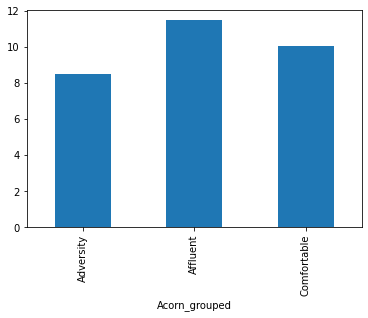

In [18]:
sum_y2013_df["normalised"].plot.bar();

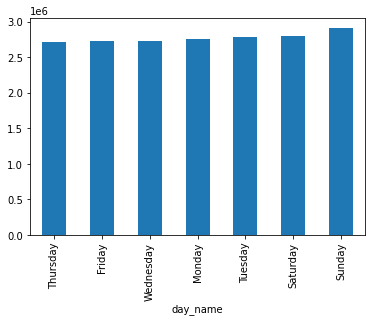

In [19]:
y2013_df.groupby("day_name").sum()["energy_sum"].sort_values().plot.bar();

<AxesSubplot:xlabel='month'>

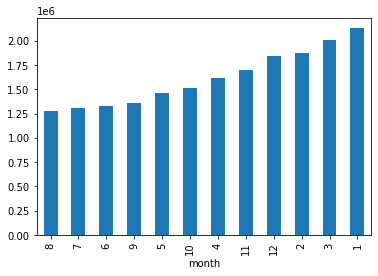

In [20]:
y2013_df.groupby("month").sum()["energy_sum"].sort_values().plot.bar()